In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import date

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
data = pd.read_sql("select * from Measurement", engine)

In [11]:
# Change datatypes for date comparison
data['date']=pd.to_datetime(data['date'])
today = data['date'].max()
one_year_ago = today - dt.timedelta(365)

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_12 = data.loc[data['date']>one_year_ago]
# view data
last_12.head()

,id,station,date,prcp,tobs
2364,2365,USC00519397,2016-08-24,0.08,79.0
2365,2366,USC00519397,2016-08-25,0.08,80.0
2366,2367,USC00519397,2016-08-26,0.00,79.0
2367,2368,USC00519397,2016-08-27,0.00,77.0
2368,2369,USC00519397,2016-08-28,0.01,78.0


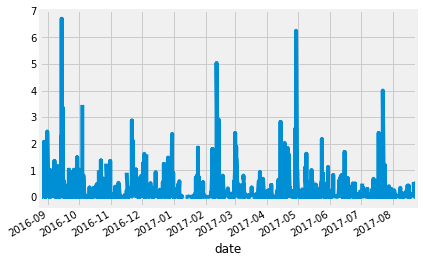

In [13]:
# Calculate the date 1 year ago from the last data point in the database
today = data['date'].max()
one_year_ago = today - dt.timedelta(365)
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the 
#index to the date column
last_12 = data.loc[data['date']>one_year_ago].set_index('date')['prcp']
# Sort the dataframe by date
last_12 = last_12.sort_values()
# Use Pandas Plotting with Matplotlib to plot the data
last_12.plot()

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_12.describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [15]:
# Design a query to show how many stations are available in this dataset?
station_data = pd.read_sql("select * from Station", engine)
count_of_stations = len(station_data['station'].unique())
count_of_stations

9

In [16]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_combined = pd.merge(data,station_data, on = 'station', how ='left')
new_df = station_combined.groupby('station').count()
new_df = new_df.rename(columns={'id_x':'count'})
new_df['count'].sort_values(ascending=False)

station
USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: count, dtype: int64

In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
lowest_temp = station_combined['tobs'].min()
highest_temp = station_combined['tobs'].max()

print(f'The lowest temperature recorded is {lowest_temp} and the highest temperature recorded is {highest_temp}.')

The lowest temperature recorded is 53.0 and the highest temperature recorded is 87.0.


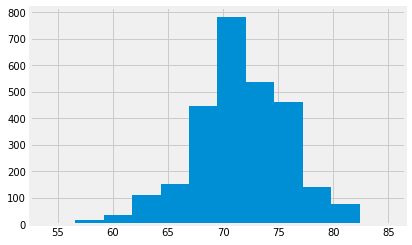

In [18]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#station with highest number of observations is USC00519281 from above

df2 = station_combined.loc[station_combined['station']=='USC00519281']
df2['tobs'].hist(bins=12)

In [19]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
    
    
    
# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [20]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
calc_temps('2016-08-23','2017-08-23')

[(58.0, 74.59058295964125, 87.0)]

In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

